In [1]:
from shapely.geometry import Point, box
import geopandas as gpd
from rasterio.crs import CRS

In [2]:
def _get_geom(bbox_point:str, radius:float=0.5):
    # Not specified: empty string
    if len(bbox_point) == 0:
        return None, None
    else:
        # Bounding box    
        if len(bbox_point.split(','))> 2:
            xmin, ymin, xmax, ymax = map(float, bbox_point.split(','))
            geom = box(xmin, ymin, xmax, ymax)
            layer ='bbox'
        # Point 
        else:
            cent_x, cent_y = map(float, bbox_point.split(','))
            geom = Point(cent_x, cent_y).buffer(radius)
            layer='central_point'
        return geom, layer

In [72]:
# Load xls or csv for NISAR calval sites
# NOTE Oklahoma central lat should be positive

nisar_df = gpd.read_file('csv/NISARSESCalvalSite2024_v1.csv')#, rows=slice(1, None))

# Rename cols
#rename_cols = ['geo_area', 'bbox', 'track']
#new_cols = {key:value for key, value in zip(nisar_df.keys(), rename_cols)}
#nisar_df = nisar_df.rename(columns=new_cols)

# Get geometries
nisar_df['geometry'] = nisar_df.apply(lambda x: _get_geom(x.bbox)[0], axis=1)
nisar_df.crs = 'EPSG:4326'

nisar_df.head()


,index,geo_area,bbox,track,field_5,geometry
0,0,"Central Valley/SAF creep, CA","-121.3,35.3,-119.0,36.8",137,,"POLYGON ((-119.00000 35.30000, -119.00000 36.8..."
1,1,Los Angeles/Pasadena/aquifer/PV landslide,"-118.5,33.55, -117.7,34.4",64,,"POLYGON ((-117.70000 33.55000, -117.70000 34.4..."
2,2,Hawaii Big Island,"-156.50,18.8,-154.7,20.3","124,87",,"POLYGON ((-154.70000 18.80000, -154.70000 20.3..."
3,3,Japan (central/northern Honshu + Hokkaido),"139,35,140,36.9",46,,"POLYGON ((140.00000 35.00000, 140.00000 36.900..."
4,4,Eastern North Slope of AK,"-160,68.3,-159,71.3",44,,"POLYGON ((-159.00000 68.30000, -159.00000 71.3..."


<Axes: >

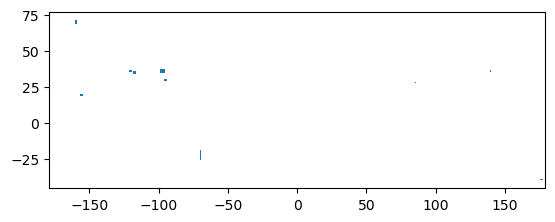

In [57]:
import contextily as cx
from matplotlib import pyplot as plt
fig, ax = plt.subplots(1)
ax.set_xlim([-179, 179])
nisar_df.plot(ax=ax)


# calVal sites: 15


TypeError: int() argument must be a string, a bytes-like object or a real number, not 'NoneType'

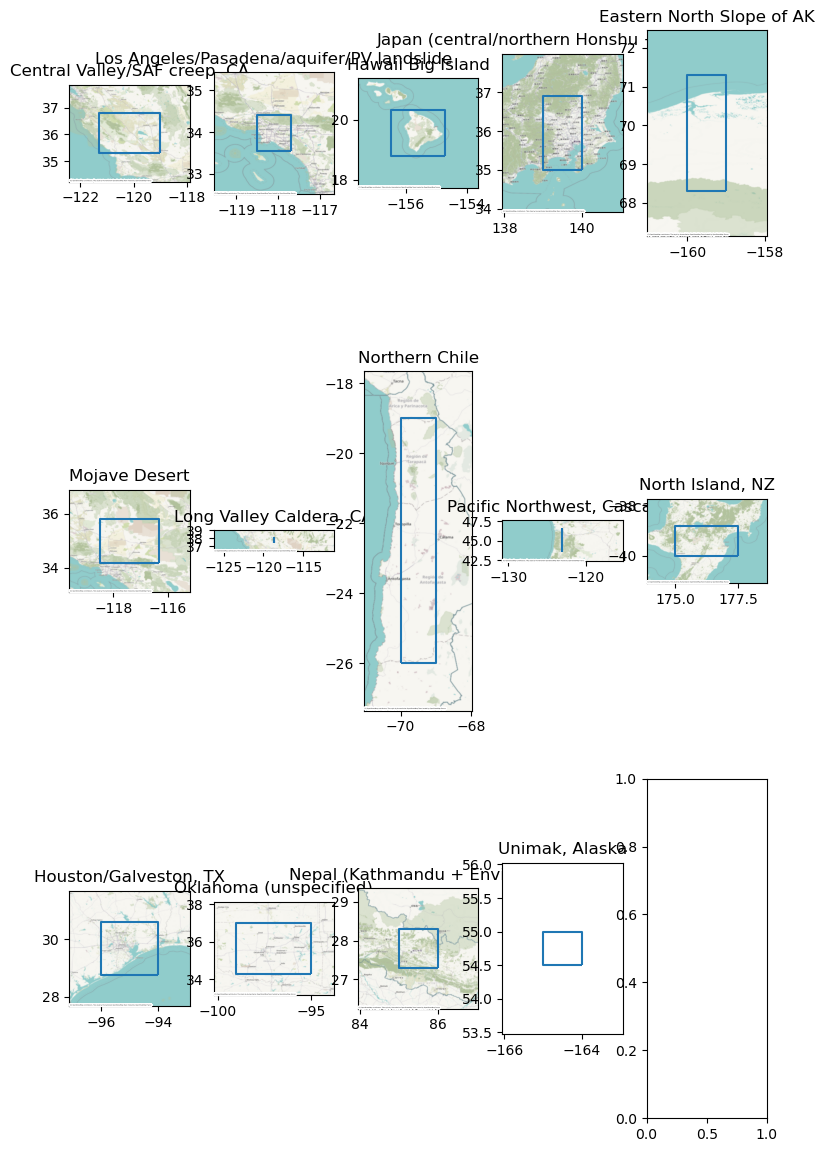

In [65]:
n_calvals = nisar_df.shape[0]
print(f'# calVal sites: {n_calvals}')

fig, ax = plt.subplots(3,5, figsize=(9, 15))

for ix, a in enumerate(ax.ravel()):
    if nisar_df.loc[[ix], 'geometry'].isna().item():
        print(f'Skipping {nisar_df.loc[[ix], "geo_area"].item()}, no bbox specified')
        continue

    nisar_df.loc[[ix], 'geometry'].exterior.plot(ax=a)
    a.set_title(nisar_df.loc[[ix], "geo_area"].item())

    extent = a.axis()
    # Expand aoi for vizualization
    a.set_xlim([extent[0]-1, extent[1]+1])
    a.set_ylim([extent[2]-1, extent[3]+1])
    cx.add_basemap(ax=a, crs='EPSG:4326',  attribution_size=1)
plt.tight_layout()

In [66]:
# Remove site with not bounding box specified
print('Sites with no specified bbox or central point')
for val in nisar_df.loc[nisar_df.geometry.isna(), 'geo_area'].values:
    print(f'  Dropping site: {val}')
nisar_df = nisar_df[~nisar_df.geometry.isna()]

Sites with no specified bbox or central point
  Dropping site: India TBD


In [67]:
nisar_df

,index,geo_area,bbox,track,field_5,geometry
0,0,"Central Valley/SAF creep, CA","-121.3,35.3,-119.0,36.8",137,,"POLYGON ((-119.00000 35.30000, -119.00000 36.8..."
1,1,Los Angeles/Pasadena/aquifer/PV landslide,"-118.5,33.55, -117.7,34.4",64,,"POLYGON ((-117.70000 33.55000, -117.70000 34.4..."
2,2,Hawaii Big Island,"-156.50,18.8,-154.7,20.3","124,87",,"POLYGON ((-154.70000 18.80000, -154.70000 20.3..."
3,3,Japan (central/northern Honshu + Hokkaido),"139,35,140,36.9",46,,"POLYGON ((140.00000 35.00000, 140.00000 36.900..."
4,4,Eastern North Slope of AK,"-160,68.3,-159,71.3",44,,"POLYGON ((-159.00000 68.30000, -159.00000 71.3..."
5,5,Mojave Desert,"-118.5,34.2,-116.3,35.8",64,,"POLYGON ((-116.30000 34.20000, -116.30000 35.8..."
6,6,"Long Valley Caldera, CA","-118.70,37.40, -118.70,38",133,,"POLYGON ((-118.70000 37.40000, -118.70000 38.0..."
7,7,Northern Chile,"-69.00,-26.00, -70.00,-19.00","54,156",,"POLYGON ((-70.00000 -26.00000, -70.00000 -19.0..."
8,8,"Pacific Northwest, Cascadia","-123, 43.5,-123,46.5",13,,"POLYGON ((-123.00000 43.50000, -123.00000 46.5..."
9,9,"North Island, NZ","175,-40, 177.50,-38.80",81,,"POLYGON ((177.50000 -40.00000, 177.50000 -38.8..."


In [71]:
# Save to geojson for inspection
nisar_df.to_file('nisar.geojson', driver='GeoJSON')

In [77]:
#nisar_hrrr = nisar_df.loc[[0,1,2, 5,6,8,10,11]] # CONUS area covered by HRRR
nisar_hrrr = nisar_df.loc[[2, 4, 11, 13]] # CONUS area covered by HRRR
#nisar_east_hemisphere = nisar_df.loc[[9,12,3]] # Nepal;, New Zeland, Japan]
nisar_east_hemisphere = nisar_df.loc[[9,12]] # Nepal;, New Zeland, Japan]
nisar_west_hemisphere = nisar_df.loc[[7]]  #Chile
nisar_east_japan = nisar_df.loc[[3]] 

In [78]:
# Save to geojson
nisar_hrrr.to_file('../AOIs/nisar_calval_hrr.geojson', driver='GeoJSON')
nisar_east_hemisphere.to_file('../AOIs/nisar_calval_ehemisphere.geojson', driver='GeoJSON')
nisar_west_hemisphere.to_file('../AOIs/nisar_calval_whemisphere.geojson', driver='GeoJSON')
nisar_east_japan.to_file('../AOIs/nisar_calval_japan.geojson', driver='GeoJSON')